# 0. 패키지 불러오기 

In [1]:
# 데이터 구성 : Series, DataFrame 
import pandas as pd

# 행렬 연산 
import numpy as np

# 데이터 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns

# 회귀 분석 
from statsmodels.formula.api import ols

# qqplot, 회귀분석의 상수항 추가 
from statsmodels.api import qqplot, add_constant

# 선형 모델 formula(y ~ X1+X2+ ...)
import statsmodels.formula.api as smf

# 평가 함수
from statsmodels.tools.eval_measures import rmse

# jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 한글 폰트 적용 
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 선형 회귀 모형 
from sklearn.linear_model import LinearRegression 

# 변수 선택법 (후진 제거법) 
from sklearn.feature_selection import RFE

# 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scale 변환 -> 표준화 회귀계수 산출 
from sklearn.preprocessing import StandardScaler

# 1. 데이터 불러오기 

In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/강연주/과제/3/체질검사.csv", engine='python')
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


# 2. 변수간 경향성 파악 

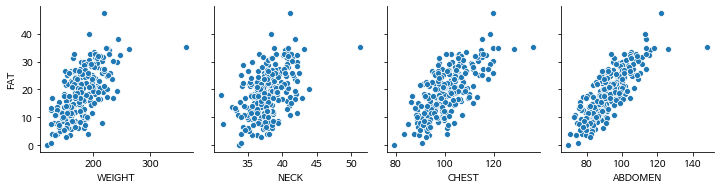

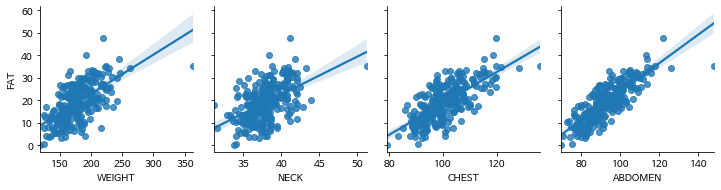

In [3]:
#산점도 행렬: 목표변수와 설명변수 지정 
sns.pairplot(df_raw, y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN']) 
#회귀 적합선 추가
sns.pairplot(df_raw, y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'], kind='reg') 

#### 선형관계 및 이상치 확인 -> 이상치 처리 검토 및 적절한 설명변수 선택

In [4]:
# 상관관계 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


# 3. 모델 생성

In [5]:
reg_model=smf.ols(formula="FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+\
                    THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           7.72e-64
Time:                        01:18:30   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

#### 분석 자료 수 : 252
#### 잔차 자유도 : 238=252-13-1
#### 회귀의 자유도 : 13(설명 변수 개수) 

#### Prob(F-statistic) <0.05 회귀모델로서 유의

#### 설명력(R-squared) : 74.9% 

#### 회귀 계수 검정 : 
#### 절편의 유의성은 검토하지 않음  : 회귀식에는 절편의 유의성 상관없이 절편 포함
#### P>|t| 를 만족하는 변수만 유의 
#### 회귀 식에는 유의하지 않은 변수도 포함해야 한다. 

In [6]:
# 설명 변수 간의 다중공선성 확인 : 설명 변수 데이터 생성 및 상수항 추가 
df_raw_x=df_raw.drop("FAT", axis=1)

# statsmodels의 상수항 추가 함수 적용 
df_raw_x_const=add_constant(df_raw_x)

# DataFrame으로 저장 
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)\
             for i in range(df_raw_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


#### 몸무게와 엉덩이 둘레의 VIF(일반적으로 5~10)가 높게 나타난다 -> 변수 특성, 영향을 고려하여 모델에서 제외 검토

In [7]:
reg_model=smf.ols(formula="FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           3.75e-64
Time:                        01:18:30   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [14]:
# 다중 공선성이 높은 변수 제거 후 공선성 재확인
df_raw_x=df_raw.drop("WEIGHT", axis=1)

# statsmodels의 상수항 추가 함수 적용 
df_raw_x_const=add_constant(df_raw_x)

# DataFrame으로 저장 
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)\
             for i in range(df_raw_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.345
10,ANKLE,1.846
2,AGE,2.202
12,FOREARM,2.238
13,WRIST,3.458
11,BICEPS,3.516
1,FAT,3.940
4,NECK,4.069
9,KNEE,4.315
8,THIGH,7.830


In [19]:
# 선형 회귀 재분석
reg_model=smf.ols(formula="FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+\
                ANKLE+BICEPS+FOREARM+WRIST",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           3.75e-64
Time:                        01:30:55   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

#### 분석 자료 수 : 252
#### 잔차 자유도 : 240=252-11-1
#### 회귀의 자유도 : 11(설명 변수 개수) 

#### Prob(F-statistic) <0.05 회귀모델로서 유의

#### 설명력(R-squared) : 73.8% 

#### 회귀 계수 검정 : 
#### 절편의 유의성은 검토하지 않음  : 회귀식에는 절편의 유의성 상관없이 절편 포함
#### P>|t| 를 만족하는 변수만 유의 
#### 이전 모델에 비해 P>|t|를 만족하는 변수의 갯수가 늘어났다. 
#### 회귀 식에는 유의하지 않은 변수도 포함해야 한다. 

# 4. 후진 제거법을 이용한 변수 선택 및 모델 생성

In [20]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수 중요도가 낮은 순으로 순차적으로 제거 

# 목표 변수 분리 
df_raw_y=df_raw['FAT']

# sklearn의 선형회귀 모델 
model=LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택 
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_raw_x,df_raw_y)

# 선택된 변수 
selected_cols=df_raw_x.columns[rfe.support_]

# 제거된 변수 
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['FAT', 'ABDOMEN', 'HIP', 'KNEE', 'FOREARM'], dtype='object')
Removed Variables : Index(['AGE', 'HEIGHT', 'NECK', 'CHEST', 'THIGH', 'ANKLE', 'BICEPS', 'WRIST'], dtype='object')


#### 선택된 변수로 새로 모델을 구성한다. 

In [21]:
rfe_reg_model=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST",data=df_raw)
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        01:31:04   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

#### 분석 자료 수 : 252
#### 잔차 자유도 : 246=252-5-1
#### 회귀의 자유도 : 5(설명 변수 개수) 

#### Prob(F-statistic) <0.05 회귀모델로서 유의

#### 설명력(R-squared) : 73.1% 

#### 회귀 계수 검정 : 
#### 절편의 유의성은 검토하지 않음  : 회귀식에는 절편의 유의성 상관없이 절편 포함
#### P>|t| 를 만족하는 변수만 유의 
#### 회귀 식에는 유의하지 않은 변수도 포함해야 한다. 

#### 변수 중요도 확인 

# 5. 결론 도출

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


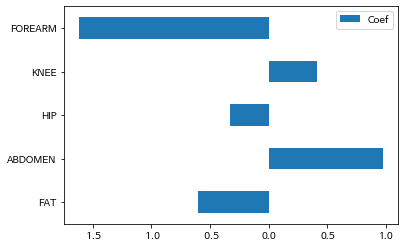

In [22]:
# 변수 중요도 확인
df_reg_coef=pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},\
                         index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=True)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        01:35:01   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


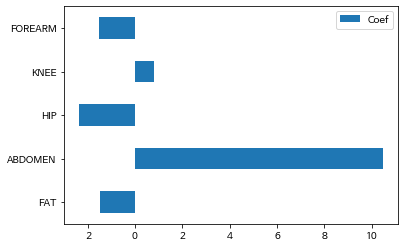

In [28]:
# 표준화 회귀계수를 이용한 변수 중요도 확인 
scaler=StandardScaler()

# Scale 변환대상 변수 : 일반적으로 설명변수 
cols=df_raw_x.columns

# Scale 변환 
np_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)

# 목표변수 추가 
df_scaled['FAT']=df_raw['FAT']
reg_model_scaled=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST", data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

# 변수 중요도 확인
df_reg_coef=pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]},\
                         index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=True)